In [1]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

==================== Computational Cancer Analysis Library ====================
<15:16:24> Checking library dependencies ...
<15:16:24> Using the following libraries:
<15:16:24> 	scipy (v0.18.0)
<15:16:24> 	statsmodels (v0.6.1)
<15:16:24> 	scikit-learn (v0.17.1)
<15:16:24> 	seaborn (v0.7.1)
<15:16:24> 	rpy2 (v2.8.2)
<15:16:24> 	pandas (v0.18.1)
<15:16:24> 	matplotlib (v1.5.1)
<15:16:24> 	numpy (v1.11.1)
<15:16:24> Planted a random seed 20121020.


# Get states

In [74]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
n_states_to_explore = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
nclustering = 500
filename_prefix = 'output/ccle_hema_k_9_H_1000clustering_0828'

In [76]:
h_normalized = ccal.support.normalize_pandas_object(h, axis=1)

In [78]:
h_normalized.T

,A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BCP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BDCM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BL70_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BV173_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,SUPT11_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SUPT1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TALL1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TF1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TO175T_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,U266B1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
nmf_compC1_9,-0.449965,-0.539302,-0.504305,-0.622439,-0.152381,-0.478465,0.144437,2.572195,2.501174,-0.122249,...,-0.139862,-0.246284,-0.347419,-0.380980,-0.475813,-0.326219,2.335551,-0.350874,-0.517059,2.489704
nmf_compC2_9,0.305558,0.138675,-0.249731,-0.023452,-0.455569,0.123874,-0.272241,-0.332668,-0.164692,-0.157839,...,-0.343964,-0.437222,-0.331475,-0.373054,-0.502418,-0.411432,-0.467581,-0.338754,-0.029344,-0.225621
nmf_compC3_9,-0.648228,-0.614441,-0.529073,-0.275134,-0.568394,-0.707496,-0.555365,-0.588960,-0.496586,-0.284472,...,-0.607411,-0.490008,-0.532578,2.624724,-0.498291,-0.416621,-0.717381,-0.633494,-0.402796,-0.568269
nmf_compC4_9,0.350550,-0.050695,-0.225088,-0.395412,0.113058,0.763712,-0.426549,-0.199070,-0.120143,-0.259794,...,0.768899,0.124952,0.168486,0.130386,0.681437,2.646980,-0.139696,0.304664,-0.194483,0.475024
nmf_compC5_9,-0.265010,-0.391949,2.611575,-0.061821,-0.163836,-0.095546,-0.496491,0.005406,0.452399,-0.594322,...,2.367176,2.586795,2.585633,-0.323300,-0.443853,-0.408774,-0.316842,-0.226500,-0.071320,-0.049509
nmf_compC6_9,-0.685676,-0.255668,-0.329559,-0.337771,-0.231696,-0.821968,2.600518,-0.651132,-0.582000,-0.592497,...,-0.785483,-0.581612,-0.464451,-0.397345,-0.312862,-0.227218,-0.468064,-0.237964,-0.309458,-0.322491
nmf_compC7_9,-0.539941,-0.292653,-0.328991,2.617668,-0.514230,-0.662408,-0.525324,-0.629211,-0.626131,-0.274394,...,-0.737369,-0.581667,-0.523136,-0.429129,2.468331,-0.382162,-0.740482,-0.625485,2.614672,-0.493720
nmf_compC8_9,2.459922,2.583063,-0.551522,-0.409616,2.589952,2.314716,-0.135715,0.071636,-0.314866,-0.343866,...,-0.233399,-0.351862,-0.530973,-0.408458,-0.436292,-0.420109,-0.372150,2.561875,-0.538668,-0.655438
nmf_compC9_9,-0.527209,-0.577030,0.106693,-0.492024,-0.616905,-0.436420,-0.333270,-0.248196,-0.649154,2.629433,...,-0.288586,-0.023092,-0.024087,-0.442844,-0.480240,-0.054444,0.886644,-0.453467,-0.551542,-0.649680


/home/cyborg/tool/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


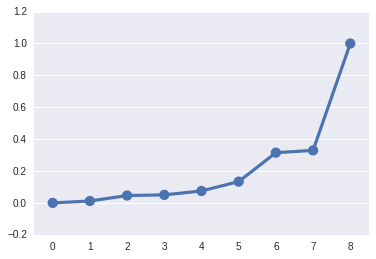

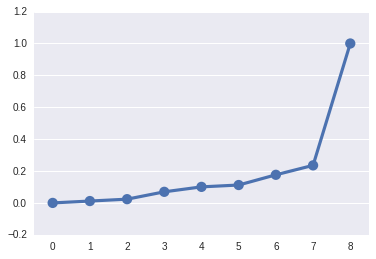

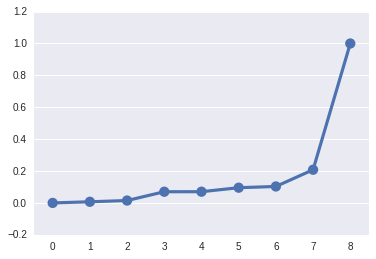

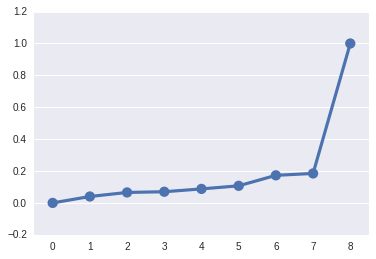

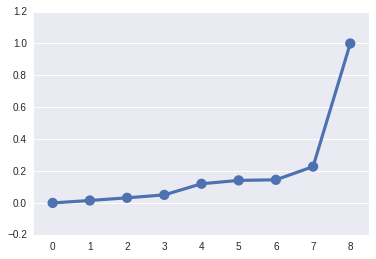

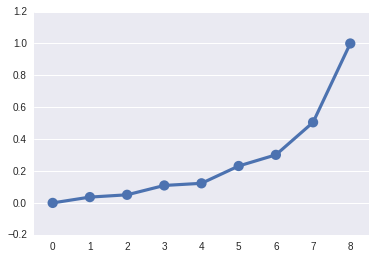

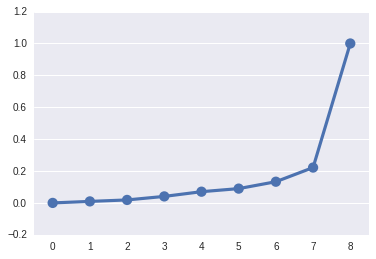

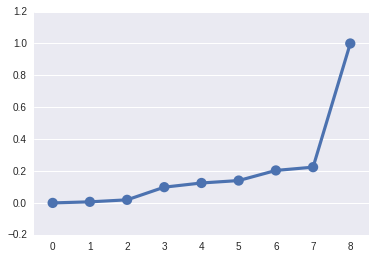

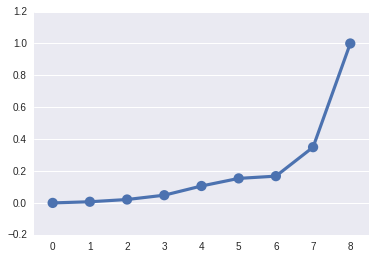

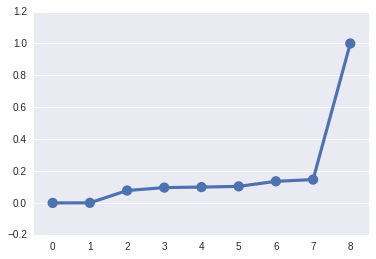

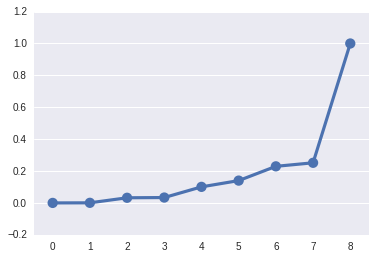

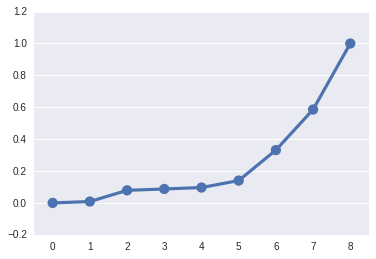

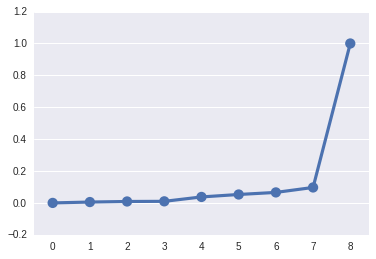

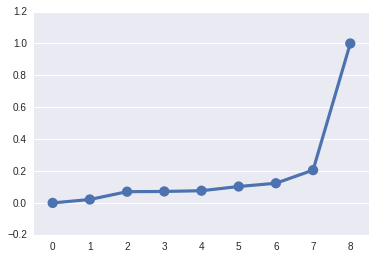

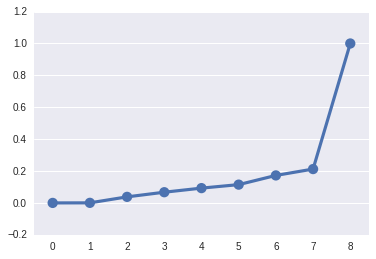

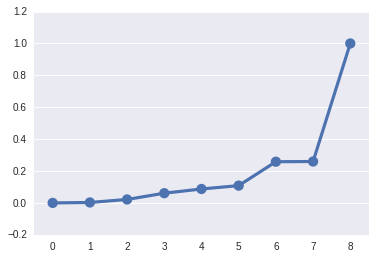

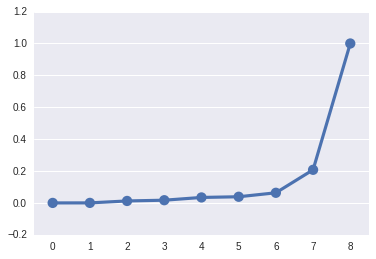

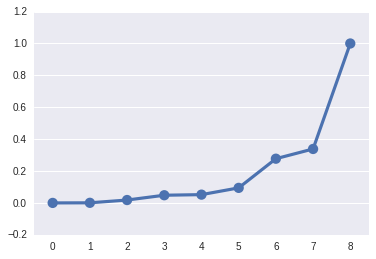

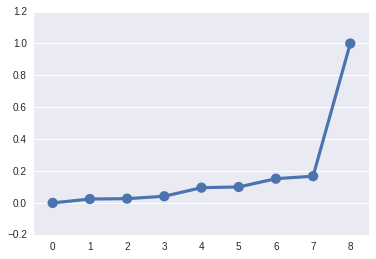

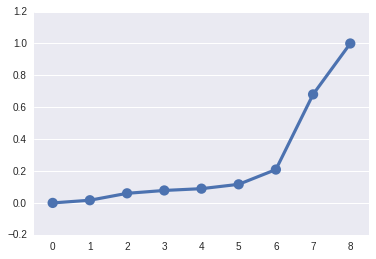

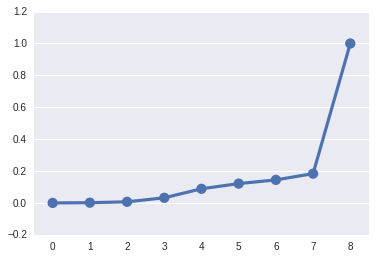

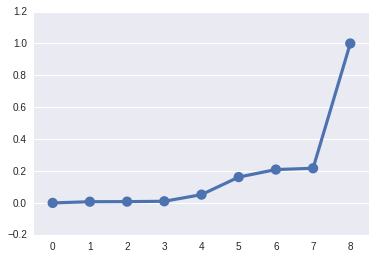

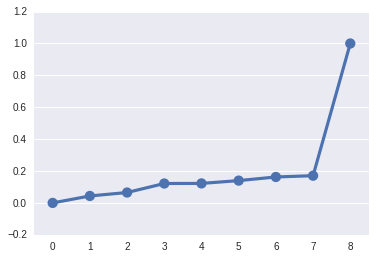

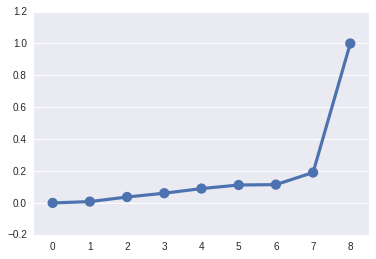

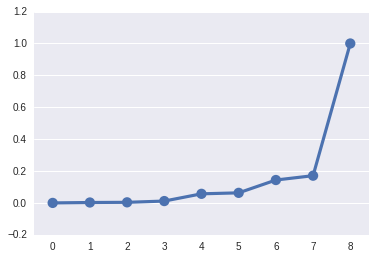

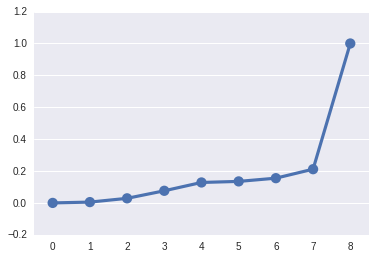

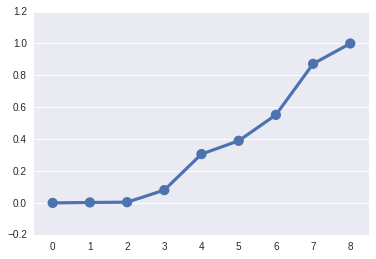

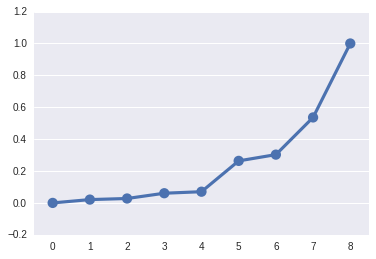

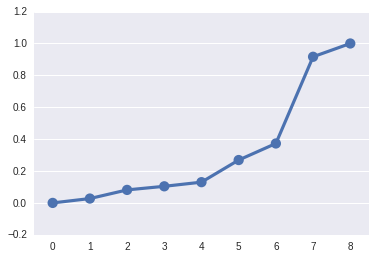

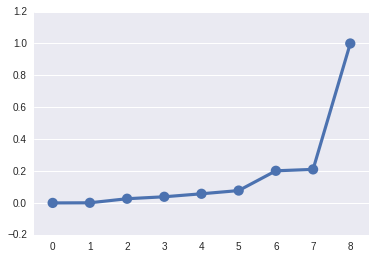

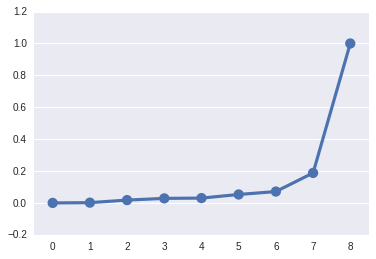

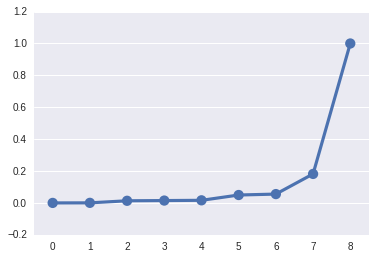

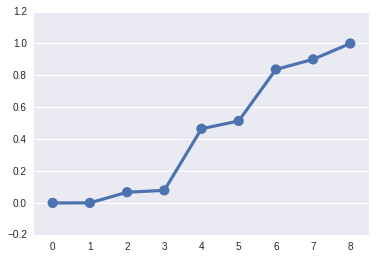

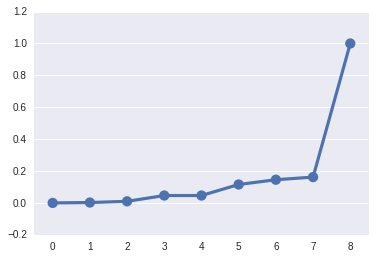

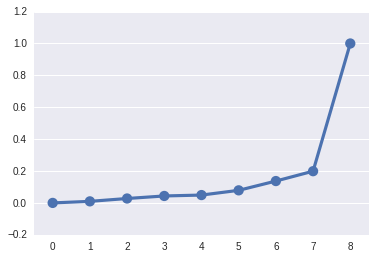

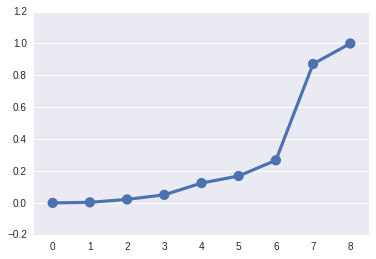

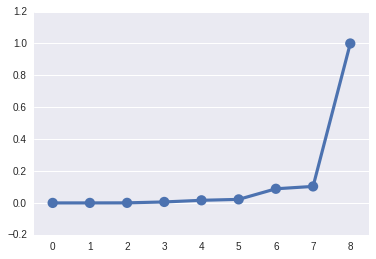

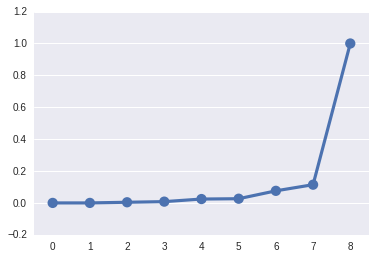

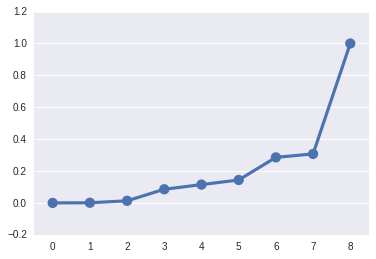

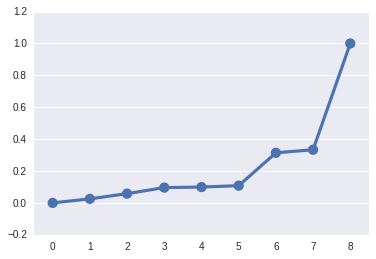

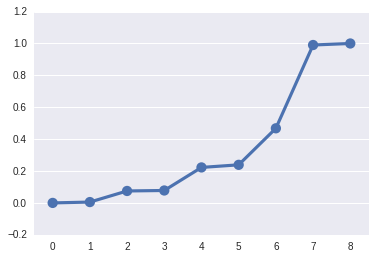

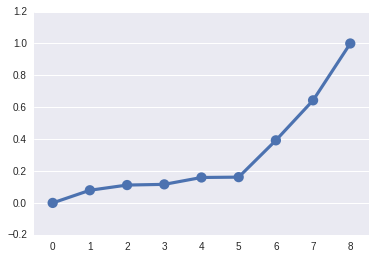

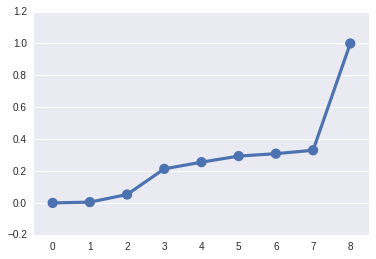

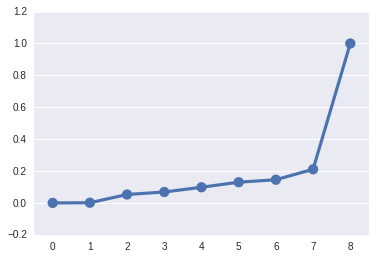

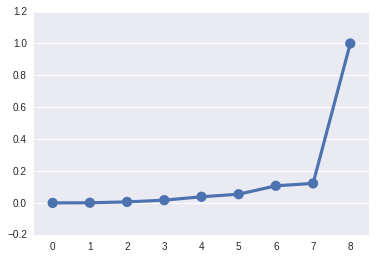

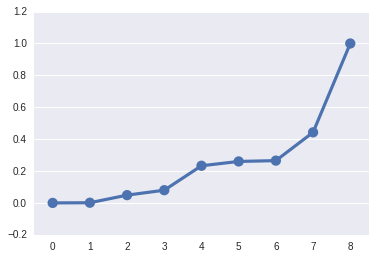

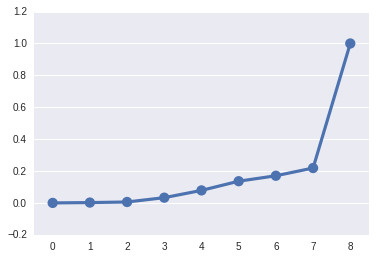

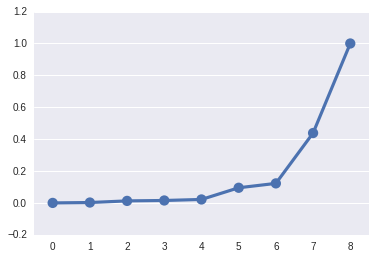

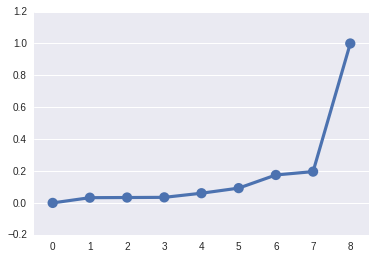

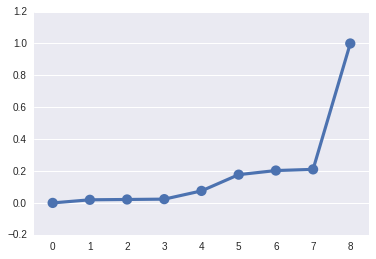

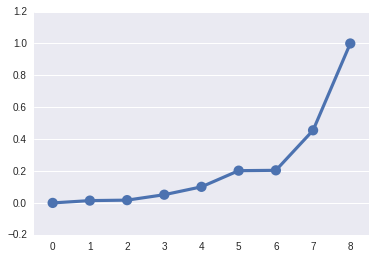

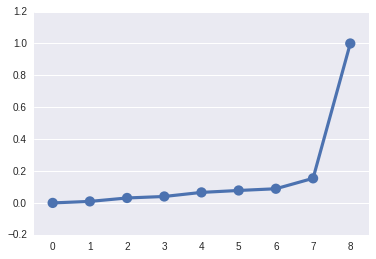

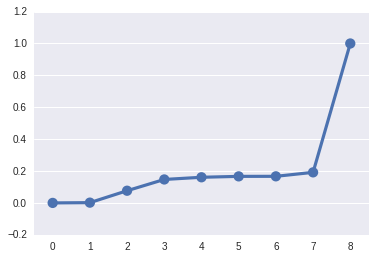

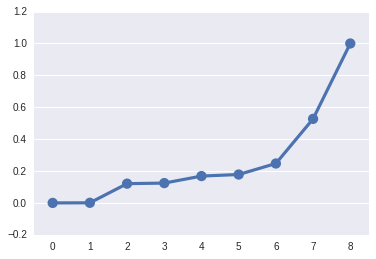

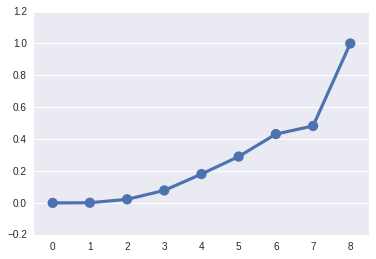

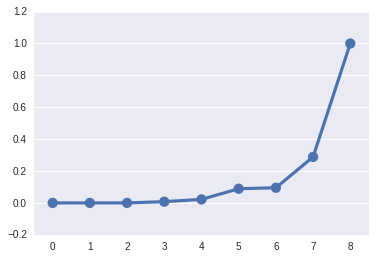

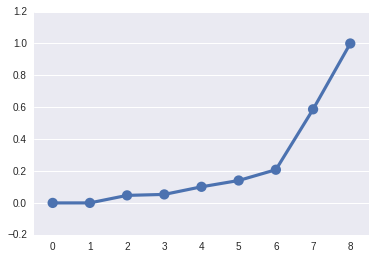

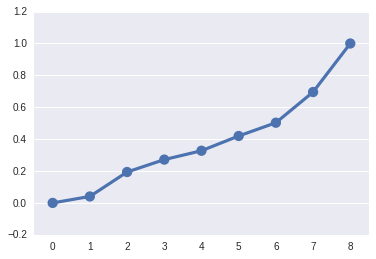

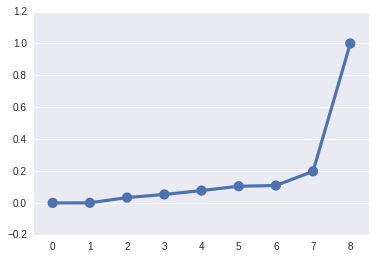

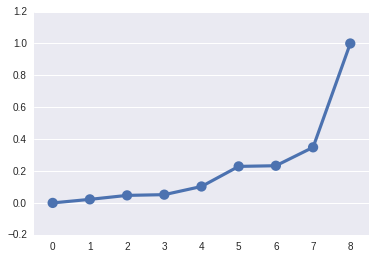

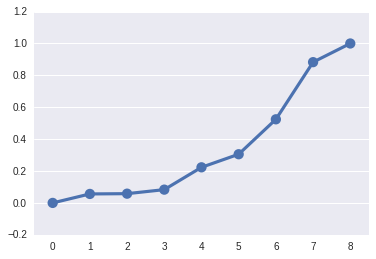

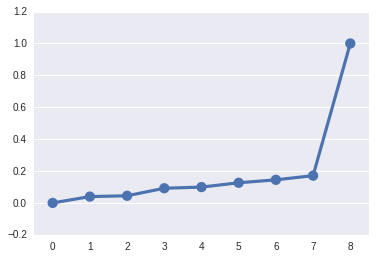

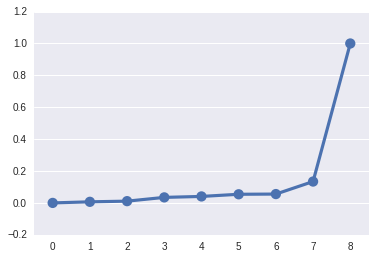

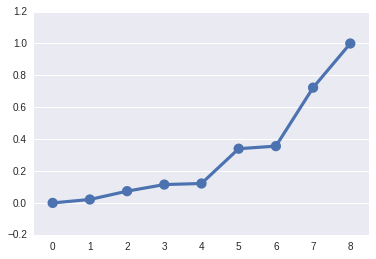

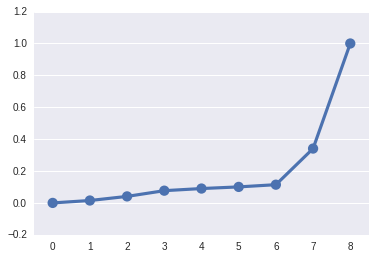

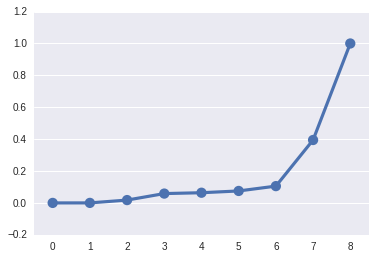

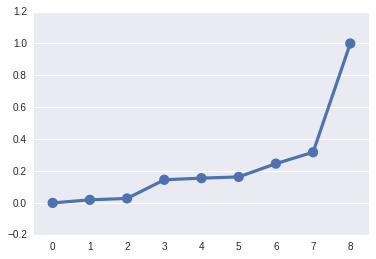

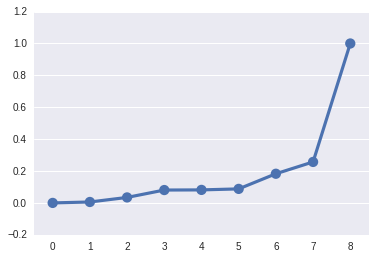

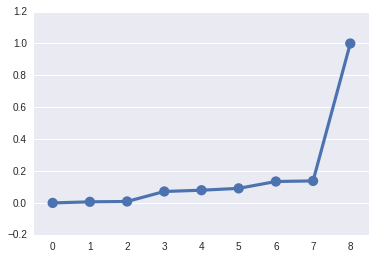

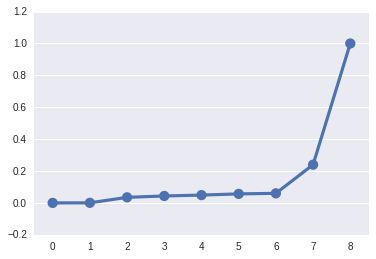

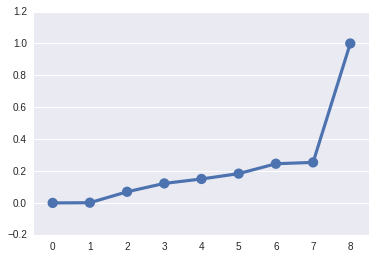

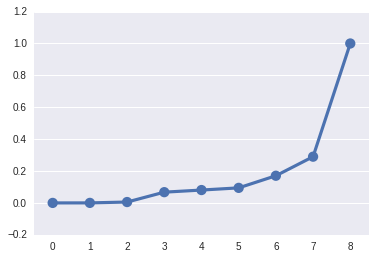

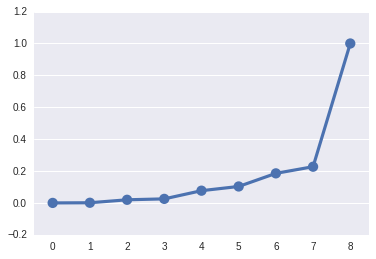

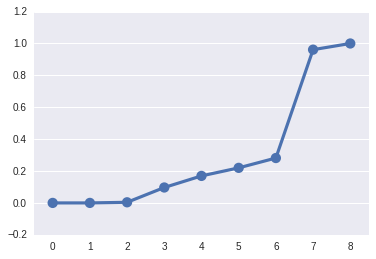

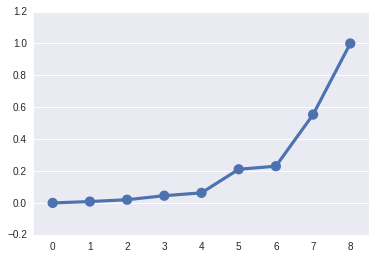

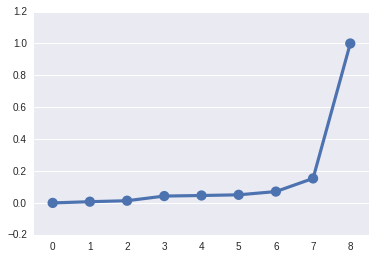

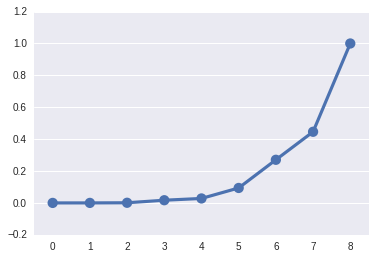

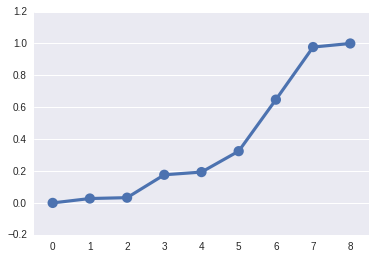

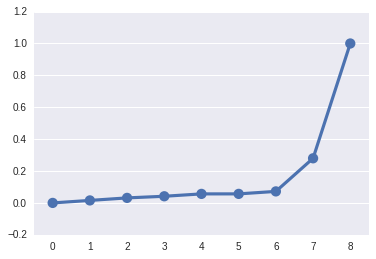

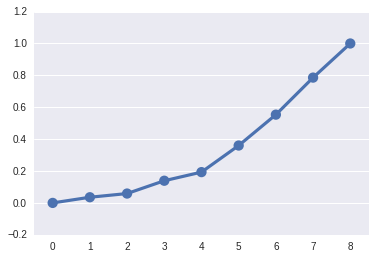

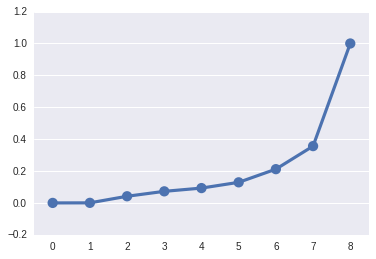

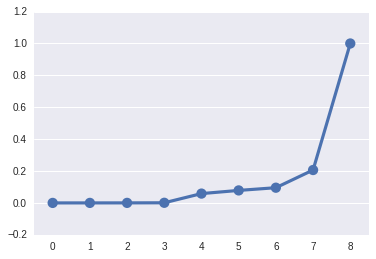

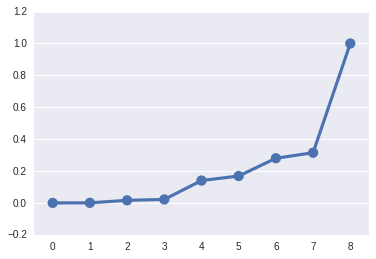

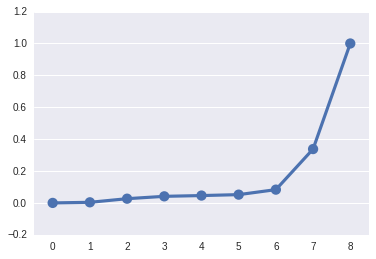

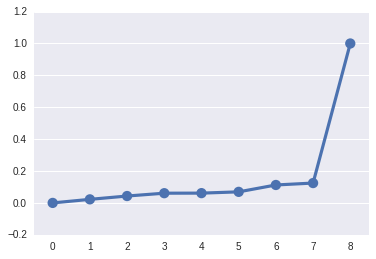

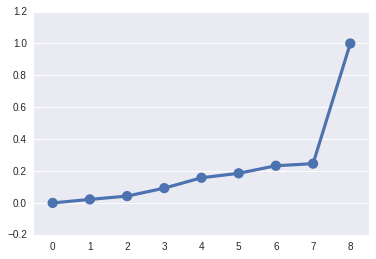

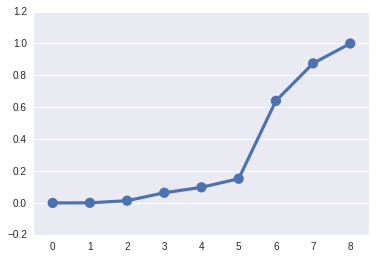

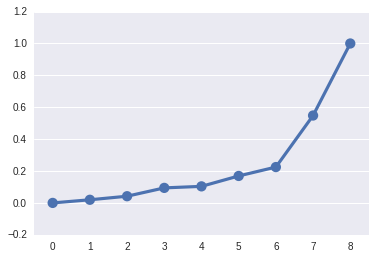

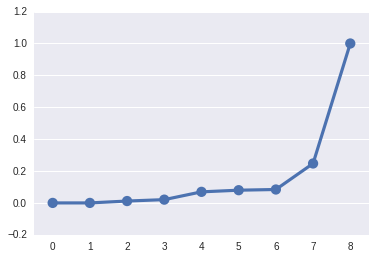

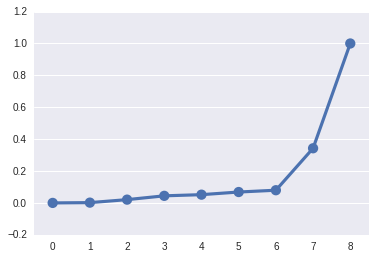

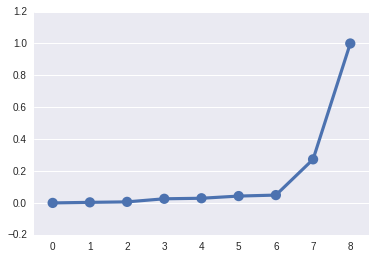

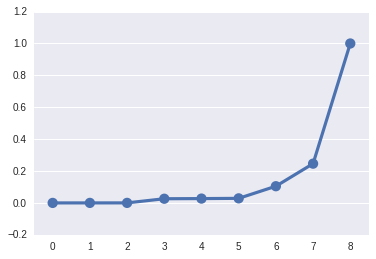

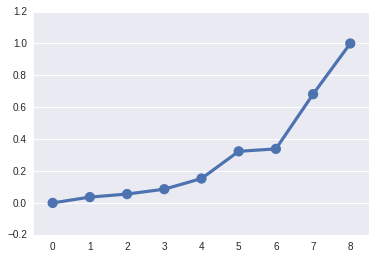

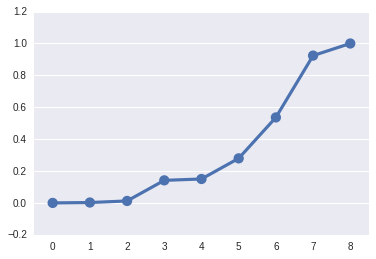

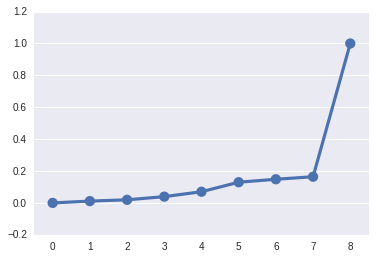

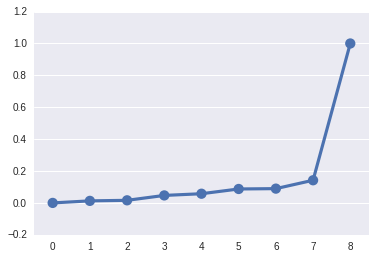

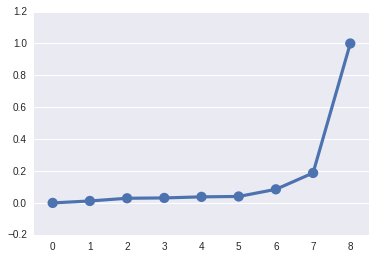

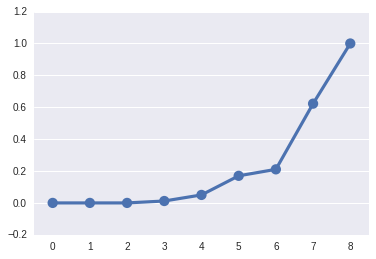

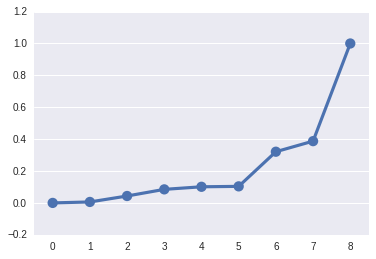

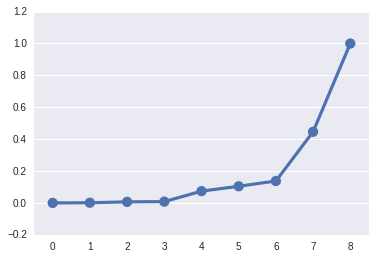

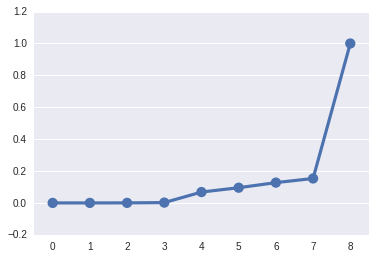

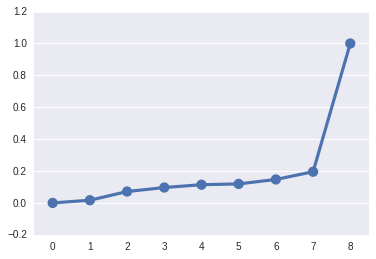

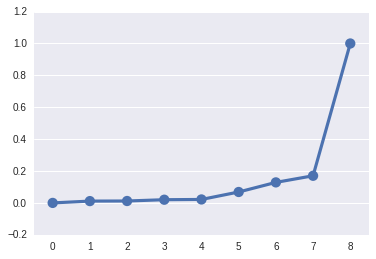

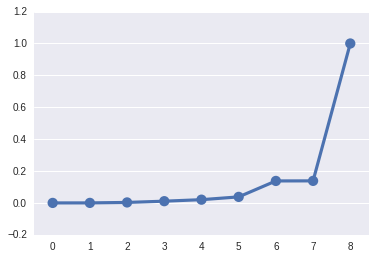

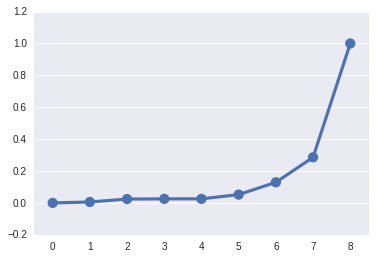

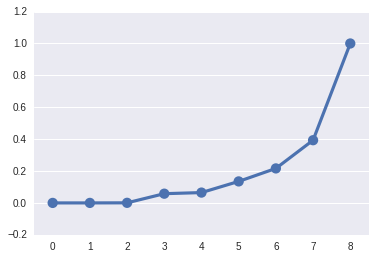

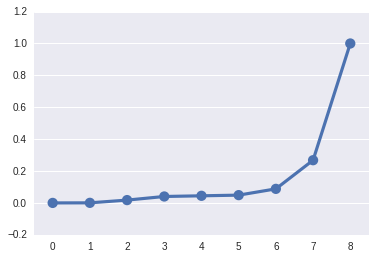

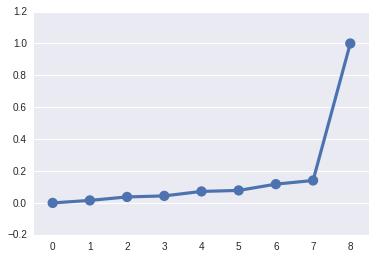

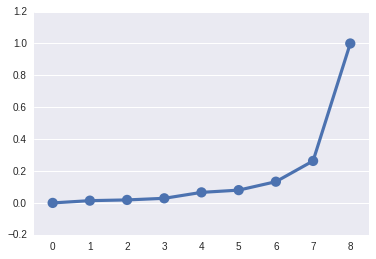

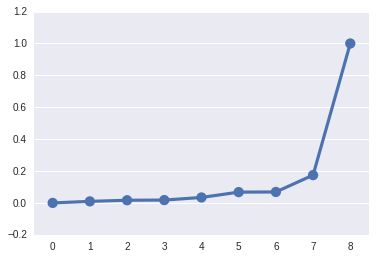

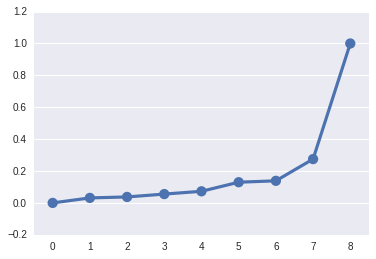

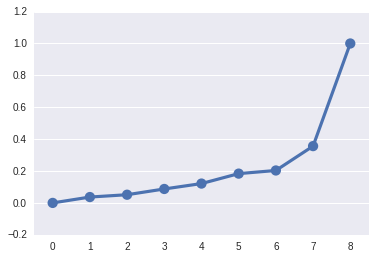

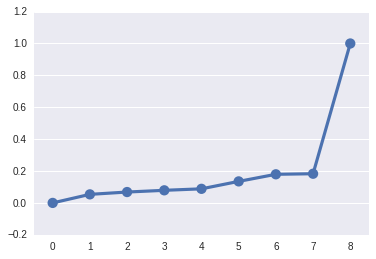

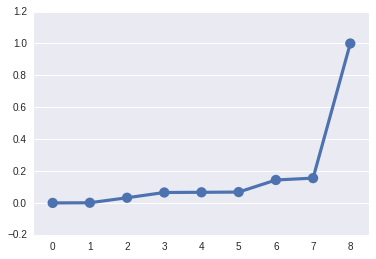

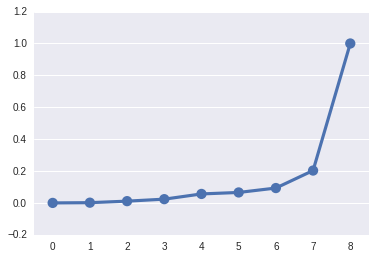

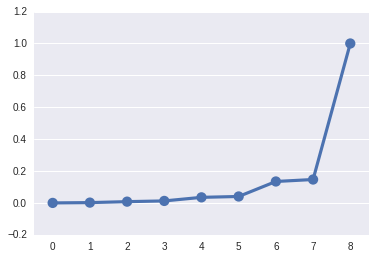

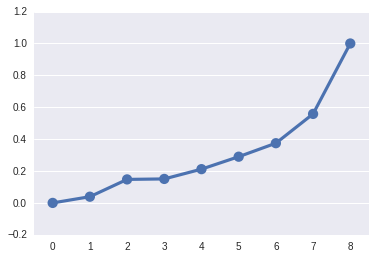

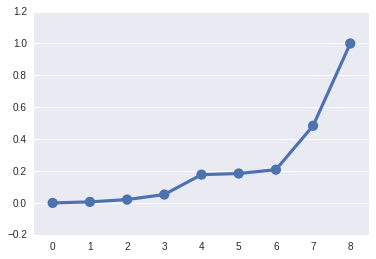

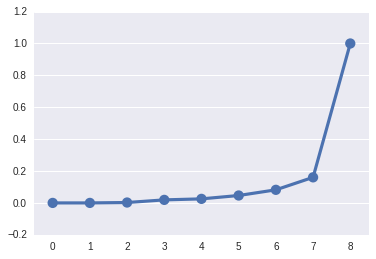

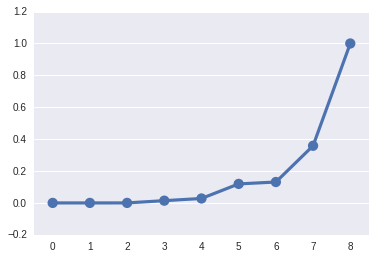

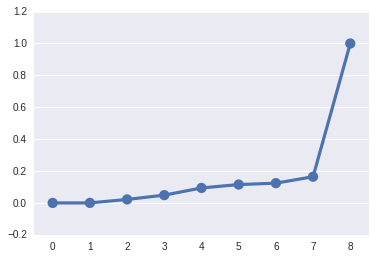

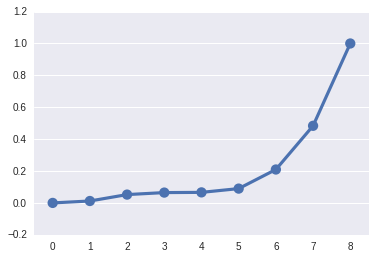

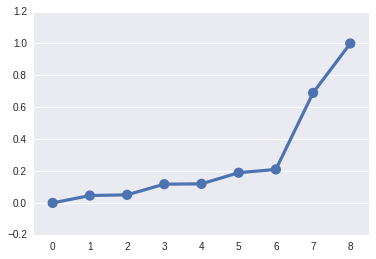

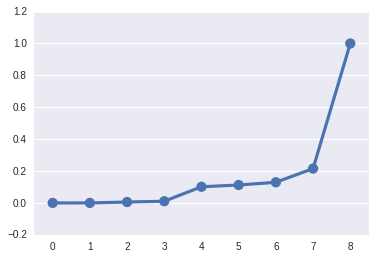

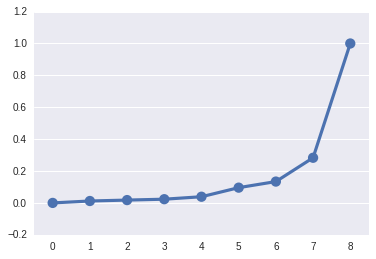

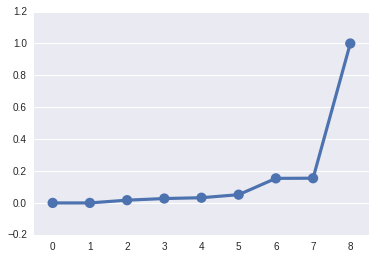

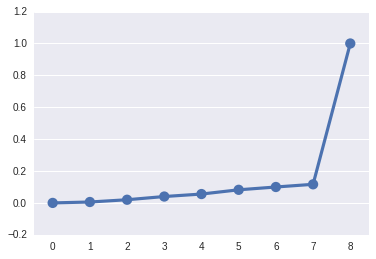

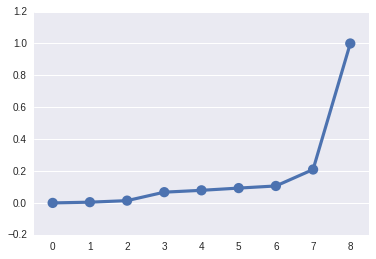

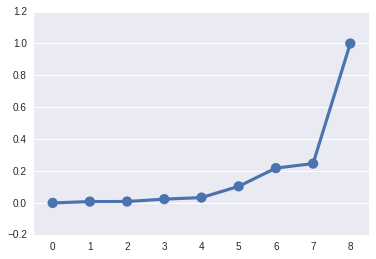

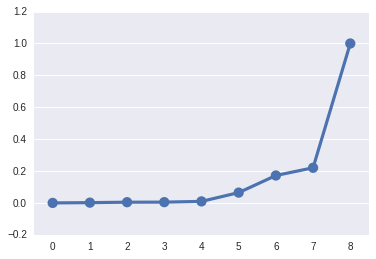

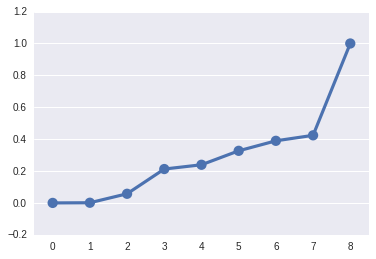

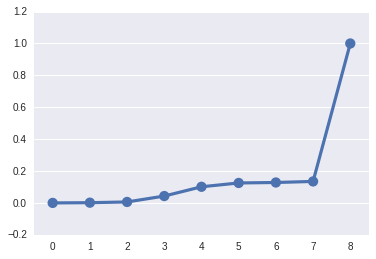

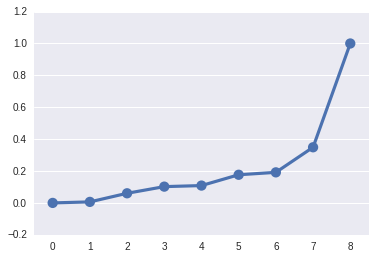

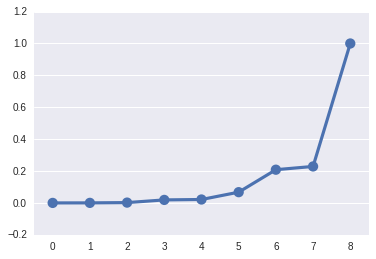

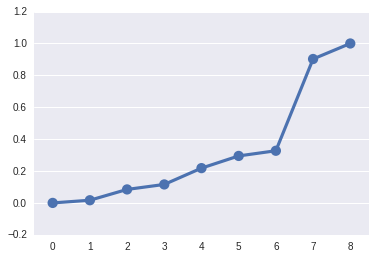

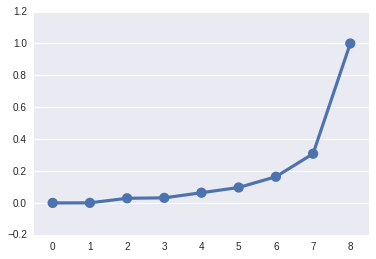

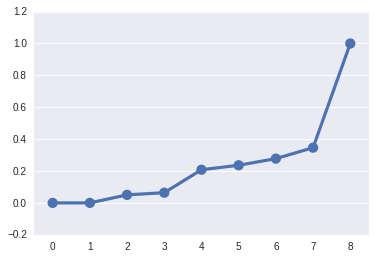

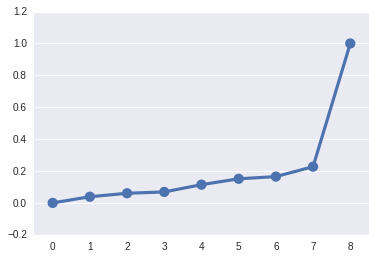

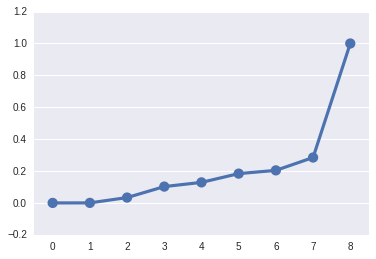

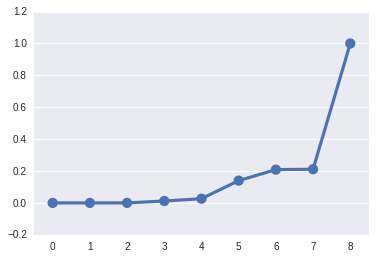

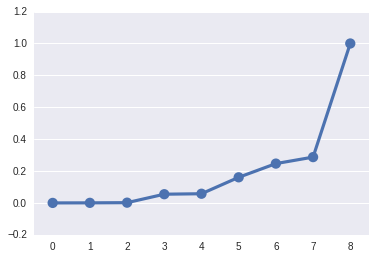

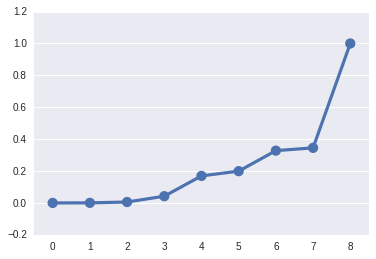

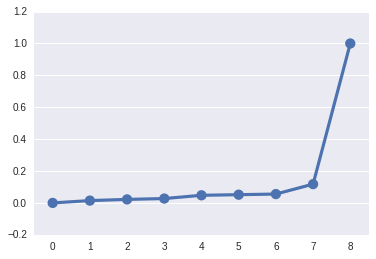

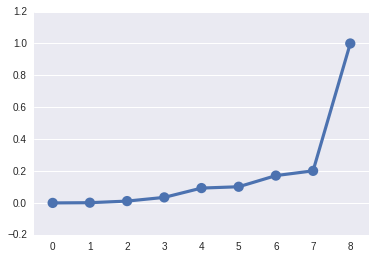

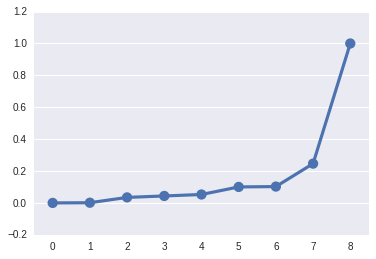

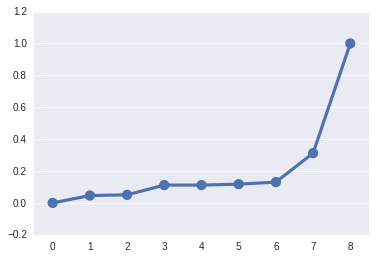

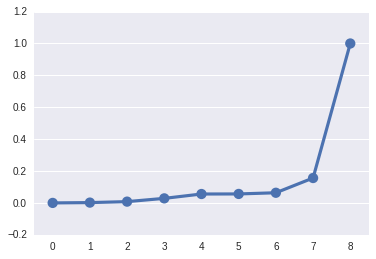

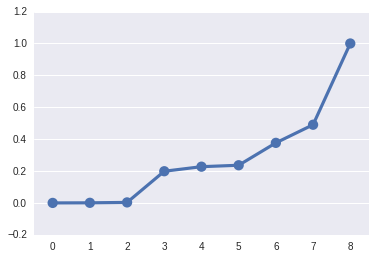

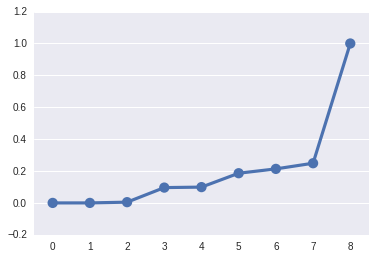

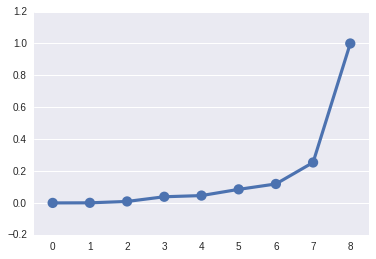

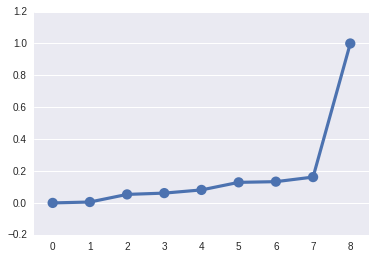

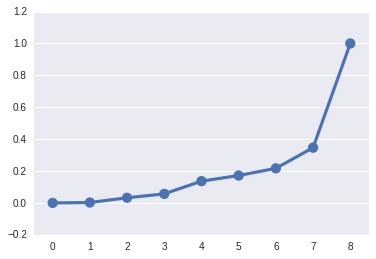

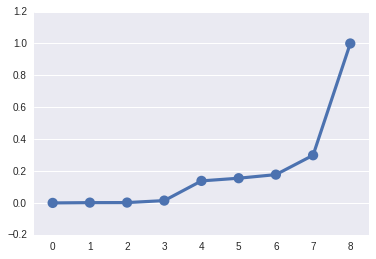

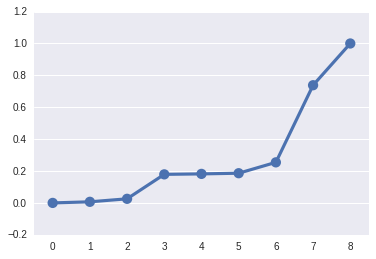

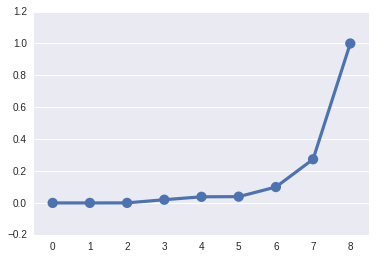

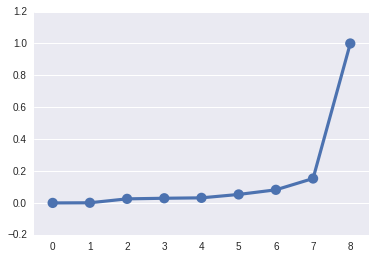

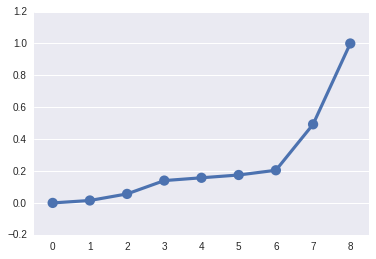

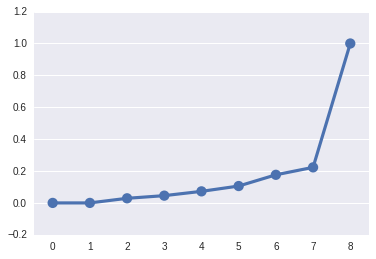

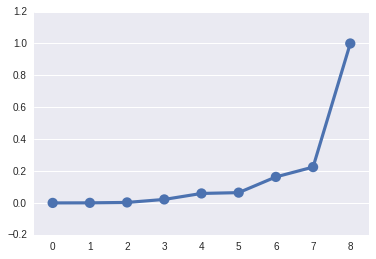

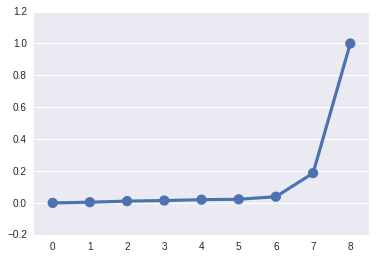

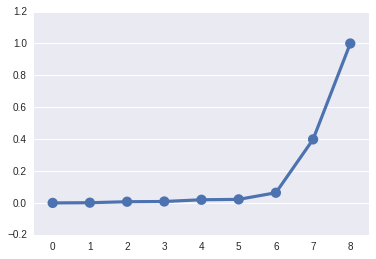

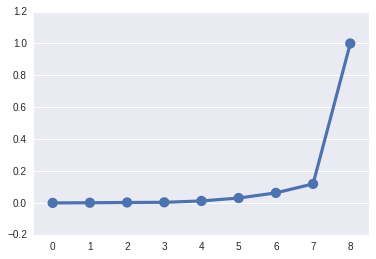

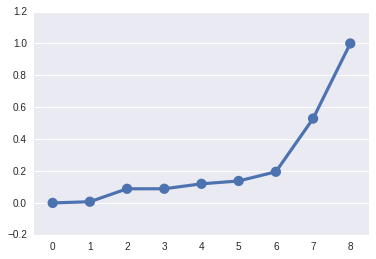

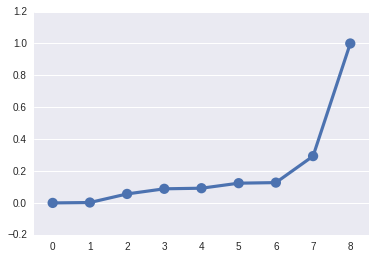

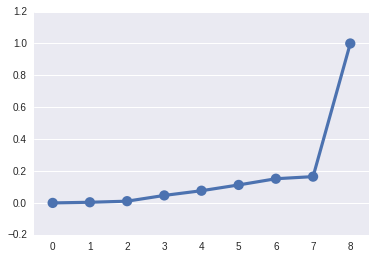

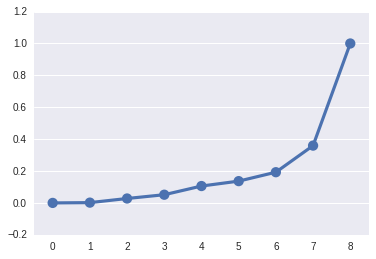

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

x = np.array(range(h_normalized.shape[0]))
for idx, col in h_normalized.items():
    fig = plt.figure()
    y = np.asarray(col.sort_values())
    sns.pointplot(x, y)

In [56]:
y = np.asarray(h.apply(sorted).apply(sum, axis=1))

[  4.43248562e-04   9.59141181e-01   3.67657484e-02]


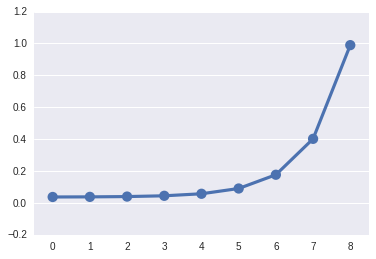

In [70]:
from scipy.optimize import curve_fit
def model_function(x, a, k, c):
    return a * np.exp(k * x) + c
popt, pcov = curve_fit(model_function, x, y)
y_ = model_function(x, *popt)
sns.pointplot(x, y_)
print(popt)

In [ ]:
# labels, memberships, cophenetic_correlation = ccal.analyze.get_states_from_h(h, n_states_to_explore, nclustering=nclustering, filename_prefix=filename_prefix)

# Map Onco-GPS

In [ ]:
labels = pd.read_csv(filename_prefix + '_labels.txt', index_col=0, sep='\t')
memberships = ccal.support.read_gct(filename_prefix + '_memberships.gct')
annotations = ccal.support.make_random_features(1, memberships.shape[1])

In [ ]:
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]))
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]),
                             annotations=np.random.random_sample(h.shape[1]))
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]),
                             annotations=np.random.choice(range(5), h.shape[1]),
                             annotation_type='categorical')
ccal.visualize.plot_onco_gps(h,
                             np.random.choice(range(10), h.shape[1]),
                             annotations=np.random.choice(range(2), h.shape[1]),
                             annotation_type='binary')

In [ ]:
for n_state in n_states_to_explore:
    states = labels.ix[n_state, :-1].astype(int).tolist()
#     signature = ''
#     ccal.visualize.plot_onco_gps(h, states, mds_is_metric=True, output_filepath='output/ccle_hema_k_9_H_1000clustering_0828_s{}_{}.pdf'.format(n_state, signature))
    signature = 'populate_random'
    ccal.visualize.plot_onco_gps(h, states, annotations=annotations, output_filepath='output/ccle_hema_k_9_H_1000clustering_0828_s{}_{}.pdf'.format(n_state, signature))